# Tree-Based Models in R

# DATACAMP

In [3]:
options(warn=-1)

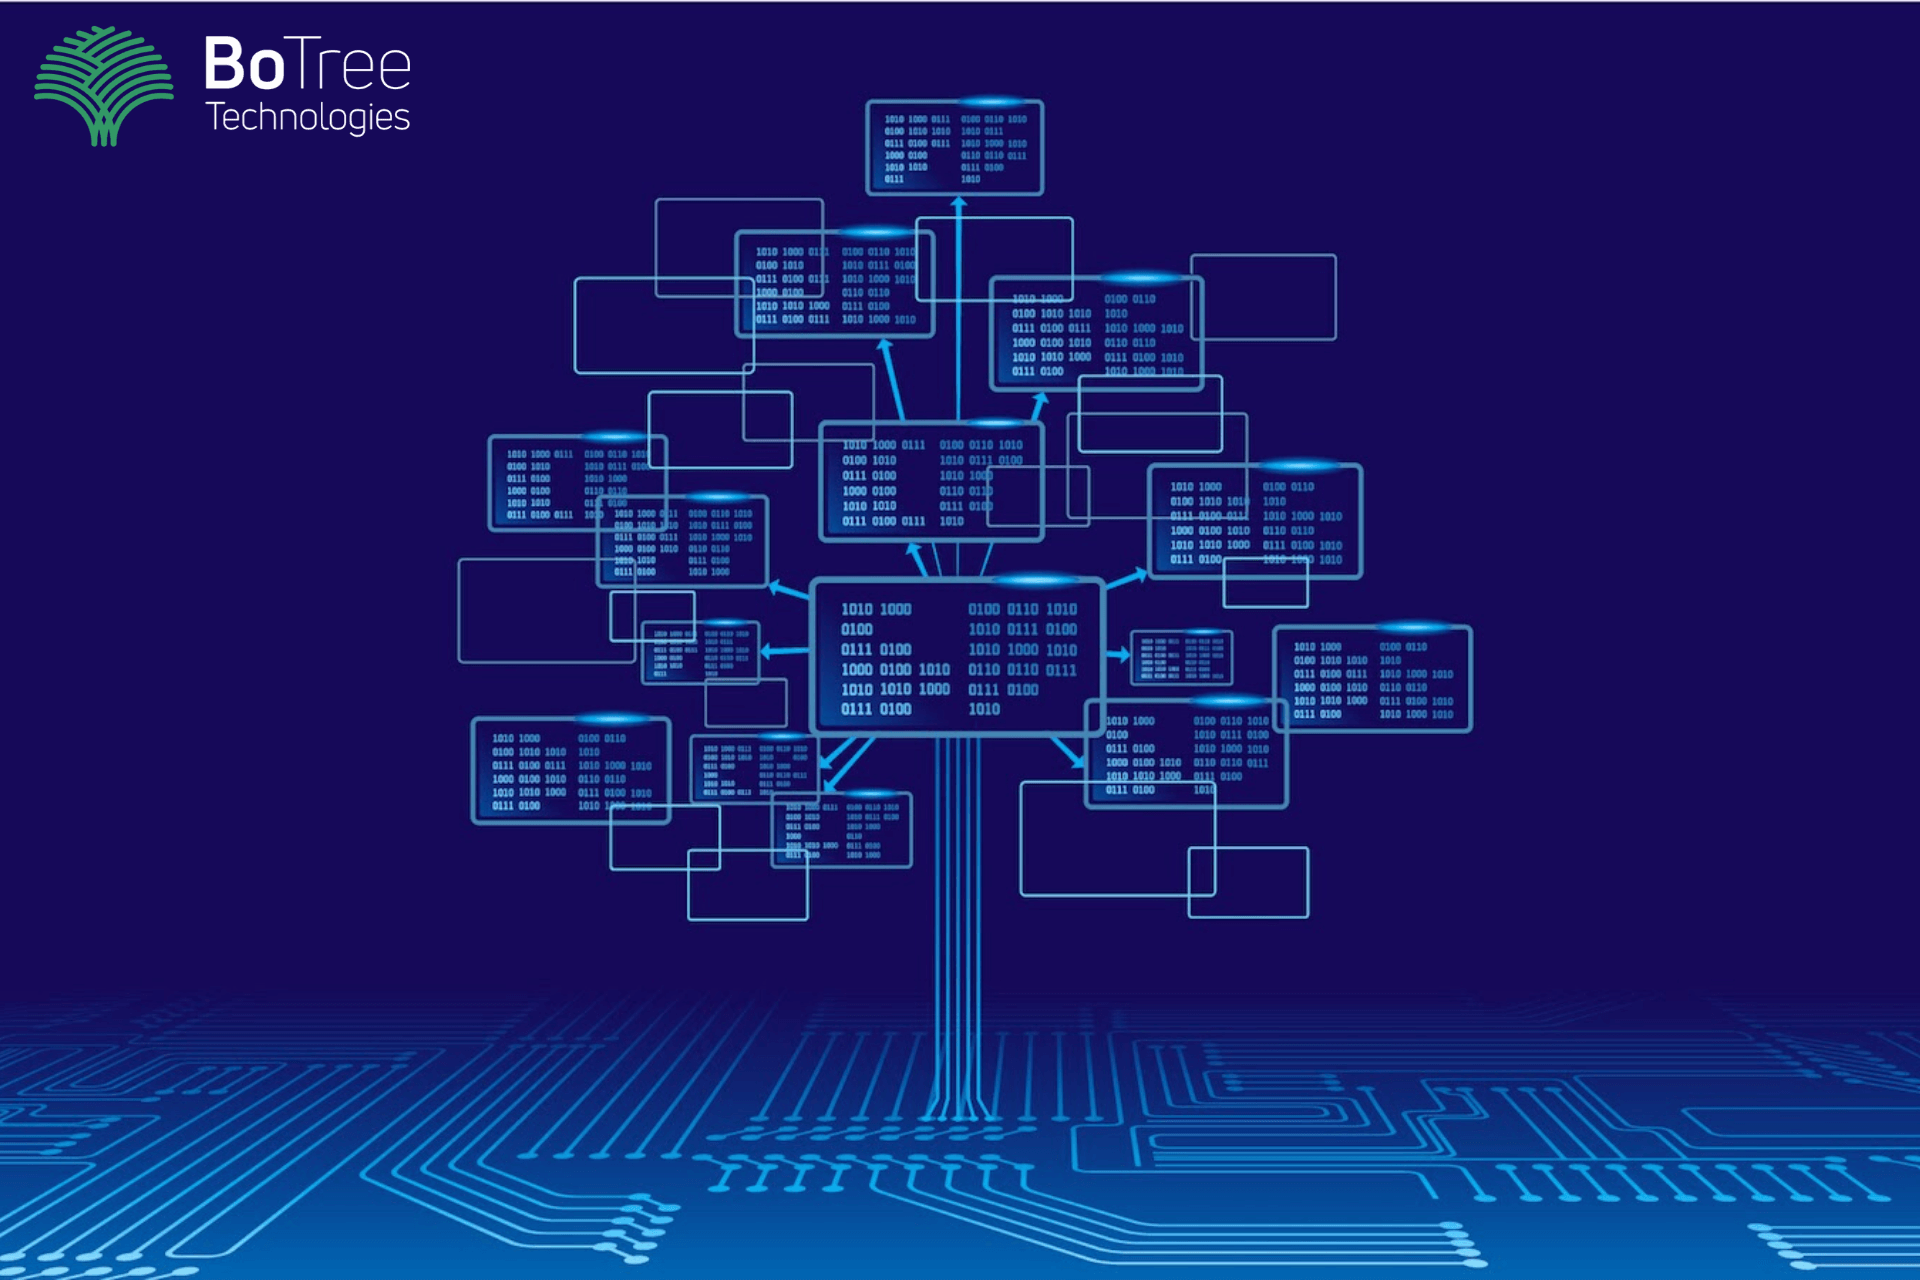

In [4]:
library("IRdisplay")
display_png(file="MLT.png")

# Course Description
In this course you'll learn how to work with tree-based models in R. This course covers everything from using a single tree for regression or classification to more advanced ensemble methods. You'll learn to implement bagged trees, Random Forests, and boosted trees using the Gradient Boosting Machine, or GBM. These powerful techinques will allow you to create high performance regression and classification models for your data.



In [6]:
# install.packages("data.table")
# install.packages("xlsx")
# install.packages('rpart')
# install.packages('rpart.plot')
# install.packages("caret")
# install.packages("e1071")
# install.packages("Metrics")
# install.packages("ipred")
# install.packages("randomForest")
# install.packages("gbm")

In [8]:
library(data.table)
library(xlsx)
library(rpart)
library(rpart.plot)
library(caret)
library(e1071)
library(Metrics)
library(ipred)
library(randomForest)
library(gbm)

# 1. Classification Trees
This chapter covers supervised machine learning with classification trees.

In [9]:
# Build a classification tree
# 
# Let's get started and build our first classification tree. 
# A classification tree is a decision tree that performs a classification (vs regression) task.
# 
# You will train a decision tree model to understand which loan applications 
# are at higher risk of default using a subset of the German Credit Dataset. 
# The response variable, called "default", indicates whether the loan went into a default or not, 
# which means this is a binary classification problem (there are just two classes).
# 
# You will use the rpart package to fit the decision tree and the rpart.plot package to visualize the tree.
# 
# Instructions
# 
# The data frame creditsub is in the workspace. This data frame is a subset of the original German Credit Dataset, 
# which we will use to train our first classification tree model.
# 
# Take a look at the data using the str() function.
# In R, formulas are used to model the response as a function of some set of predictors, 
# so the formula here is default ~ ., which means use all columns (except the response column) as predictors.
# Fit the classification decision tree using the rpart() function from the rpart package. 
# In the rpart() function, note that you'll also have to provide the training data frame.
# Using the model object that you create, plot the decision tree model using 
# the rpart.plot() function from the rpart.plot package.

In [10]:
creditsub <- read.xlsx(file ="df.xlsx", sheetIndex = 1, header=TRUE,colClasses=c(months_loan_duration="numeric",percent_of_income ="numeric",years_at_residence="numeric",age="numeric"))

'data.frame':	1046 obs. of  5 variables:
 $ months_loan_duration: num  48 42 24 36 30 12 48 12 24 15 ...
 $ percent_of_income   : num  2 2 3 2 4 3 3 1 4 2 ...
 $ years_at_residence  : num  2 4 4 2 2 1 4 1 4 4 ...
 $ age                 : num  22 45 53 35 28 25 24 22 60 28 ...
 $ default             : Factor w/ 3 levels "default","no",..: 3 2 3 2 3 3 3 2 3 2 ...


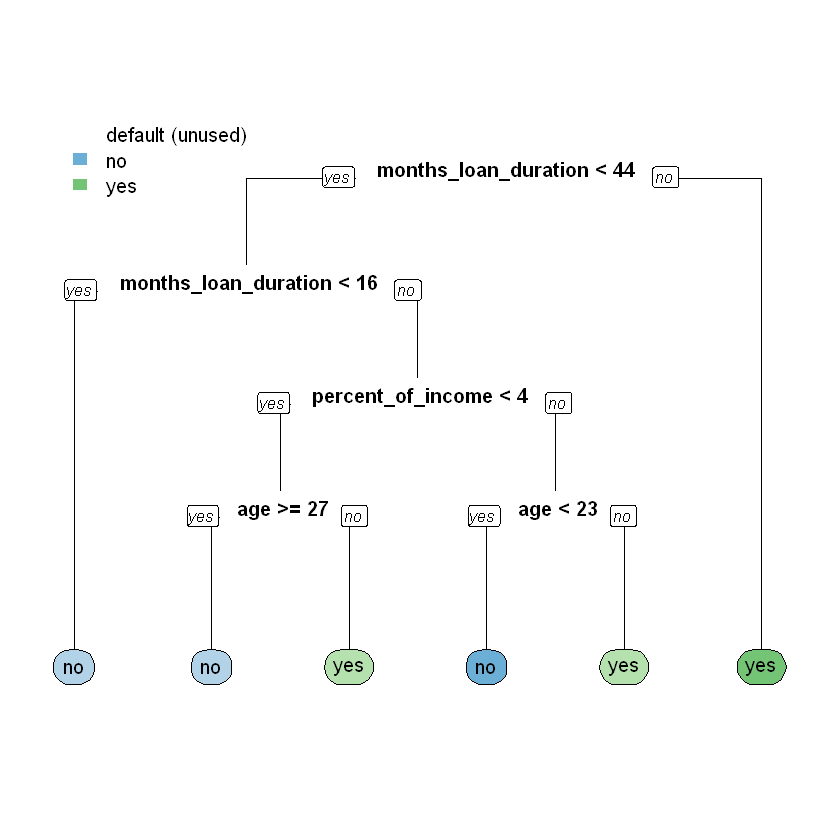

In [11]:
# Look at the data
str(creditsub)

# Create the model
credit_model <- rpart(formula = default ~ ., 
                        data = creditsub, 
                        method = "class")

# Display the results
rpart.plot(x = credit_model, yesno = 2, type = 0, extra = 0)

In [12]:
# Train/test split
# 
# For this exercise, you'll randomly split the German Credit Dataset into two pieces: 
# a training set (80%) called credit_train and a test set (20%) that we will call credit_test. 
# We'll use these two sets throughout the chapter.
# 
# Instructions
# The credit data frame is loaded into the workspace.
# 
# Define n, the number of rows in the credit data frame.
# Define n_train to be ~80% of n.
# Set a seed (for reproducibility) and then sample n_train rows to define the set of training set indices.
# Using row indices, subset the credit data frame to create two new datasets: credit_train and credit_test

In [13]:
url = 'https://assets.datacamp.com/production/repositories/710/datasets/b649085c43111c83ba7ab6ec172d83cdc14a2942/credit.csv'
credit <- fread(url,colClasses=c(default="factor",checking_balance="factor",credit_history="factor",purpose="factor",savings_balance="factor",employment_duration="factor",other_credit="factor",housing="factor",
job="factor",phone="factor"))

In [14]:
# Total number of rows in the credit data frame
n <- nrow(credit)

# Number of rows for the training set (80% of the dataset)
n_train <- round(0.8 * n)

# Create a vector of indices which is an 80% random sample
set.seed(123)
train_indices <- sample(1:n,n_train)

# Subset the credit data frame to training indices only
credit_train <- credit[train_indices, ]  
  
# Exclude the training indices to create the test set
credit_test <- credit[-train_indices, ]

In [15]:
# Train a classification tree model
# 
# In this exercise, you will train a model on the newly created training set and print the model object 
# to get a sense of the results.
# 
# Instructions
# 
# Train a classification tree using the credit_train data frame.
# Look at the model output by printing the model object.

In [16]:
# Train the model (to predict 'default')
credit_model <- rpart(formula = default~., 
                        data = credit_train, 
                        method = "class")

# Look at the model output                      
print(credit_model)

n= 800 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

  1) root 800 230 no (0.7125000 0.2875000)  
    2) checking_balance=> 200 DM,unknown 365  48 no (0.8684932 0.1315068) *
    3) checking_balance=1 - 200 DM,< 0 DM 435 182 no (0.5816092 0.4183908)  
      6) months_loan_duration< 22.5 259  85 no (0.6718147 0.3281853)  
       12) credit_history=critical,good,poor 235  68 no (0.7106383 0.2893617)  
         24) months_loan_duration< 11.5 70  11 no (0.8428571 0.1571429) *
         25) months_loan_duration>=11.5 165  57 no (0.6545455 0.3454545)  
           50) amount>=1282 112  30 no (0.7321429 0.2678571) *
           51) amount< 1282 53  26 yes (0.4905660 0.5094340)  
            102) purpose=business,education,furniture/appliances 34  12 no (0.6470588 0.3529412) *
            103) purpose=car,renovations 19   4 yes (0.2105263 0.7894737) *
       13) credit_history=perfect,very good 24   7 yes (0.2916667 0.7083333) *
      7) months_loan_duration>=22.5 176  79 y

In [17]:
# Compute confusion matrix
# 
# As discussed in the previous video, there are a number of different metrics by which you can measure 
# the performance of a classification model. In this exercise, we will evaluate the performance of 
# the model using test set classification error. A confusion matrix is a convenient way to examine 
# the per-class error rates for all classes at once.
# 
# The confusionMatrix() function from the caret package prints both the confusion matrix and a number 
# of other useful classification metrics such as "Accuracy" (fraction of correctly classified instances).
# 
# The caret package has been loaded for you.
# 
# Instructions
# 
# Generate class predictions for the credit_test data frame using the credit_model object.
# Using the caret::confusionMatrix() function, compute the confusion matrix for the test set.

In [18]:
# Generate predicted classes using the model object
class_prediction <- predict(object = credit_model,  
                          newdata = credit_test,   
                          type = "class")  
                            
# Calculate the confusion matrix for the test set
confusionMatrix(data =class_prediction ,       
                  reference = credit_test$default) 

Confusion Matrix and Statistics

          Reference
Prediction  no yes
       no  117  44
       yes  13  26
                                          
               Accuracy : 0.715           
                 95% CI : (0.6471, 0.7764)
    No Information Rate : 0.65            
    P-Value [Acc > NIR] : 0.03046         
                                          
                  Kappa : 0.3023          
                                          
 Mcnemar's Test P-Value : 7.08e-05        
                                          
            Sensitivity : 0.9000          
            Specificity : 0.3714          
         Pos Pred Value : 0.7267          
         Neg Pred Value : 0.6667          
             Prevalence : 0.6500          
         Detection Rate : 0.5850          
   Detection Prevalence : 0.8050          
      Balanced Accuracy : 0.6357          
                                          
       'Positive' Class : no              
                              

In [19]:
# Compare models with a different splitting criterion
# 
# Train two models that use a different splitting criterion and use the validation set to choose 
# a "best" model from this group. To do this you'll use the parms argument of the rpart() function. 
# This argument takes a named list that contains values of different parameters you can use 
# to change how the model is trained. Set the parameter split to control the splitting criterion.
# 
# Instructions
# 
# The datasets credit_test and credit_train have already been loaded for you.
# 
# Train a model, splitting the tree based on gini index.
# Train a model, splitting the tree based on information index.
# Generate predictions on the validation set using both models.
# Classification error is the fraction of incorrectly classified instances. 
# Compute and compare the test set classification error of the two models by using the ce() function.

In [20]:
# Train a gini-based model
credit_model1 <- rpart(formula = default ~ ., 
                         data = credit_train, 
                         method = "class",
                         parms = list(split = "gini"))

# Train an information-based model
credit_model2 <- rpart(formula = default ~ ., 
                         data = credit_train, 
                         method = "class",
                         parms = list(split = "information"))

# Generate predictions on the validation set using the gini model
pred1 <- predict(object = credit_model1, 
               newdata = credit_test,
               type = "class")    

# Generate predictions on the validation set using the information model
pred2 <- predict(object = credit_model2, 
               newdata = credit_test,
               type = "class")

# Compare classification error
ce(actual = credit_test$default, 
     predicted = pred1)
ce(actual = credit_test$default, 
     predicted = pred2)

[1] 0.285

[1] 0.285

# 2. Regression Trees

In this chapter you'll learn how to use a single tree for regression, instead of classification.

In [21]:
# Split the data
# 
# These examples will use a subset of the Student Performance Dataset from UCI ML Dataset Repository.
# 
# The goal of this exercise is to predict a student's final Mathematics grade based on the following variables:
# sex, age, address, studytime (weekly study time), schoolsup (extra educational support), 
# famsup (family educational support), paid (extra paid classes within the course subject) and absences.
# 
# The response is final_grade (numeric: from 0 to 20, output target).
# 
# After initial exploration, split the data into training, validation, and test sets. 
# In this chapter, we will introduce the idea of a validation set, which can be used to select 
# a "best" model from a set of competing models.
# 
# In Chapter 1, we demonstrated a simple way to split the data into two pieces using the sample() function. 
# In this exercise, we will take a slightly different approach to splitting the data that allows us to split 
# the data into more than two parts (here, we want three: train, validation, test). 
# We still use the sample() function, but instead of sampling the indices themselves, 
# we will assign each row to either the training, validation or test sets according to a probability distribution.
# 
# The dataset grade is already in your workspace.
# 
# Instructions
# 
# Take a look at the data using the str() function.
# Set a seed (for reproducibility) and then sample n_train rows to define the set of training set indices.
# Draw a sample of size nrow(grade) from the number 1 to 3 (with replacement). 
# You want approximately 70% of the sample to be 1 and the remaining 30% to be equally split between 2 and 3.
# Subset grade using the sample you just drew so that indices with the value 1 are in grade_train, 
# indices with the value 2 are in grade_valid, and indices with 3 are in grade_test.

In [22]:
url = 'https://assets.datacamp.com/production/repositories/710/datasets/3d720e80d1ad70a88322c2175fa0e6041761a5f9/grade.csv'
grade = fread(url)

In [23]:
# Look at the data
str(grade)

# Set seed and create assignment
set.seed(1)
assignment <- sample(1:3, size = nrow(grade), prob = c(0.7,0.15,0.15), replace = TRUE)

# Create a train, validation and tests from the original data frame 
grade_train <- grade[assignment == 1, ]    # subset grade to training indices only
grade_valid <- grade[assignment == 2, ]  # subset grade to validation indices only
grade_test <- grade[assignment == 3, ]   # subset grade to test indices only

Classes 'data.table' and 'data.frame':	395 obs. of  8 variables:
 $ final_grade: num  3 3 5 7.5 5 7.5 5.5 3 9.5 7.5 ...
 $ age        : int  18 17 15 15 16 16 16 17 15 15 ...
 $ address    : chr  "U" "U" "U" "U" ...
 $ studytime  : int  2 2 2 3 2 2 2 2 2 2 ...
 $ schoolsup  : chr  "yes" "no" "yes" "no" ...
 $ famsup     : chr  "no" "yes" "no" "yes" ...
 $ paid       : chr  "no" "no" "yes" "yes" ...
 $ absences   : int  6 4 10 2 4 10 0 6 0 0 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [24]:
# Train a regression tree model
# 
# In this exercise, we will use the grade_train dataset to fit a regression tree using rpart() and visualize it 
# using rpart.plot(). A regression tree plot looks identical to a classification tree plot, 
# with the exception that there will be numeric values in the leaf nodes instead of predicted classes.
# 
# This is very similar to what we did previously in Chapter 1. 
# When fitting a classification tree, we use method = "class", however, when fitting a regression tree, 
# we need to set method = "anova". 
# By default, the rpart() function will make an intelligent guess as to what the method value 
# should be based on the data type of your response column, 
# but it's recommened that you explictly set the method for reproducibility reasons 
# (since the auto-guesser may change in the future).
# 
# The grade_train training set is loaded into the workspace.
# 
# Instructions
# 
# Using the grade_train dataframe and the given formula, train a regresion tree.
# Look at the model output by printing the model object.
# Plot the decision tree using rpart.plot().

n= 282 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 282 1519.49700 5.271277  
   2) absences< 0.5 82  884.18600 4.323171  
     4) paid=no 50  565.50500 3.430000  
       8) famsup=yes 22  226.36360 2.272727 *
       9) famsup=no 28  286.52680 4.339286 *
     5) paid=yes 32  216.46880 5.718750  
      10) age>=17.5 10   82.90000 4.100000 *
      11) age< 17.5 22   95.45455 6.454545 *
   3) absences>=0.5 200  531.38000 5.660000  
     6) absences>=13.5 42  111.61900 4.904762 *
     7) absences< 13.5 158  389.43670 5.860759  
      14) schoolsup=yes 23   50.21739 4.847826 *
      15) schoolsup=no 135  311.60000 6.033333  
        30) studytime< 3.5 127  276.30710 5.940945 *
        31) studytime>=3.5 8   17.00000 7.500000 *


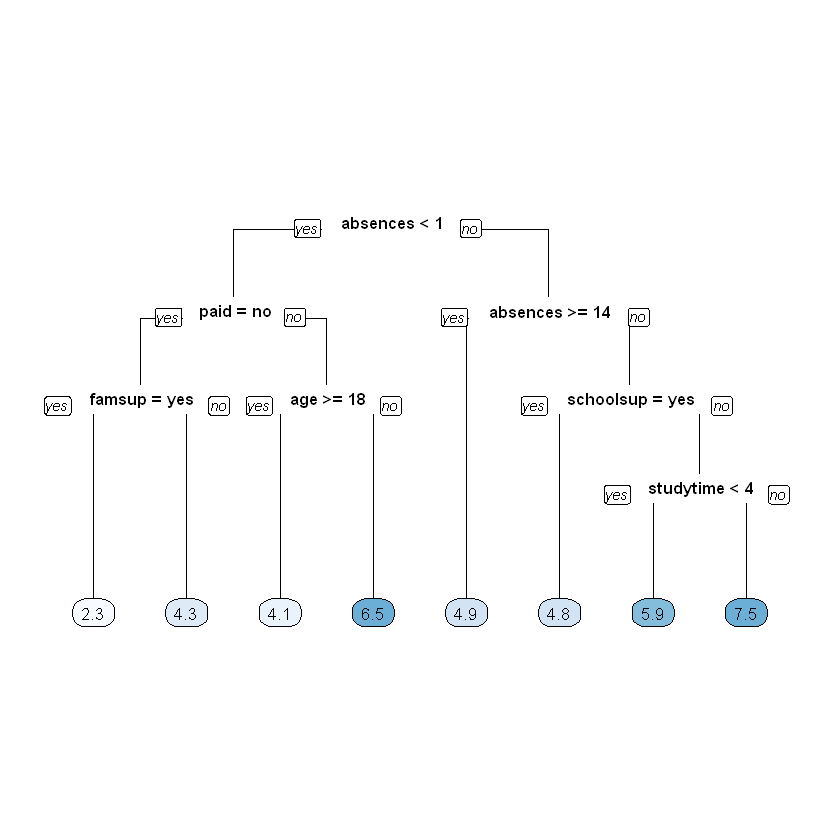

In [25]:
# Train the model
grade_model <- rpart(formula = final_grade ~ ., 
                       data =grade_train, 
                       method = "anova")

# Look at the model output                      
print(grade_model)

# Plot the tree model
rpart.plot(x = grade_model , yesno = 2, type = 0, extra = 0)

In [26]:
# Evaluate a regression tree model
# 
# Predict the final grade for all students in the test set. The grade is on a 0-20 scale. 
# Evaluate the model based on test set RMSE (Root Mean Squared Error). 
# RMSE tells us approximately how far away our predictions are from the true values.
# 
# Instructions
# 
# First generate predictions on the grade_test data frame using the grade_model object.
# After generating test set predictions, use the rmse() function from the Metrics package to compute test set RMSE.

In [27]:
# Generate predictions on a test set
pred <- predict(object =grade_model,   # model object 
                  newdata = grade_test)  # test dataset

# Compute the RMSE
rmse(actual = grade_test$final_grade, 
       predicted = pred)

[1] 2.278249

In [28]:
# Tuning the model
# 
# Tune (or "trim") the model using the prune() function by finding 
# the best "CP" value (CP stands for "Complexity Parameter").
# 
# Instructions
# 
# Print the CP Table, a matrix of information on the optimal prunings (based on CP).
# Retrieve the optimal CP value; the value for CP which minimizes cross-validated error of the model.
# Use the prune() function trim the tree, snipping off the least important splits, based on CP.

          CP nsplit rel error    xerror       xstd
1 0.06839852      0 1.0000000 1.0066743 0.09169976
2 0.06726713      1 0.9316015 1.0185398 0.08663026
3 0.03462630      2 0.8643344 0.8923588 0.07351895
4 0.02508343      3 0.8297080 0.9046335 0.08045100
5 0.01995676      4 0.8046246 0.8920489 0.08153881
6 0.01817661      5 0.7846679 0.9042142 0.08283114
7 0.01203879      6 0.7664912 0.8833557 0.07945742
8 0.01000000      7 0.7544525 0.8987112 0.08200148


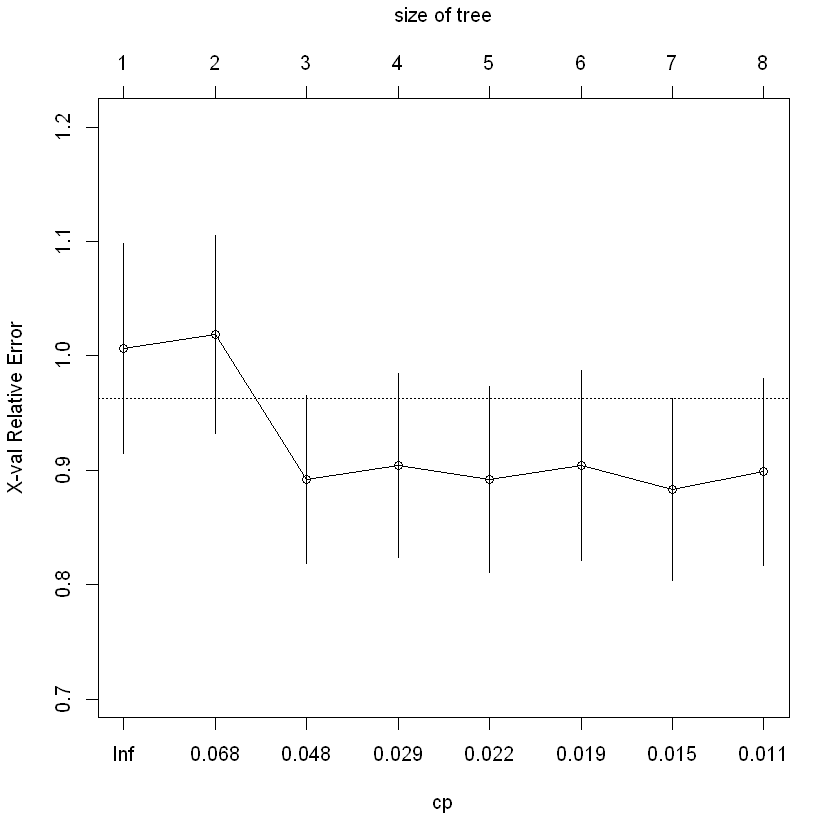

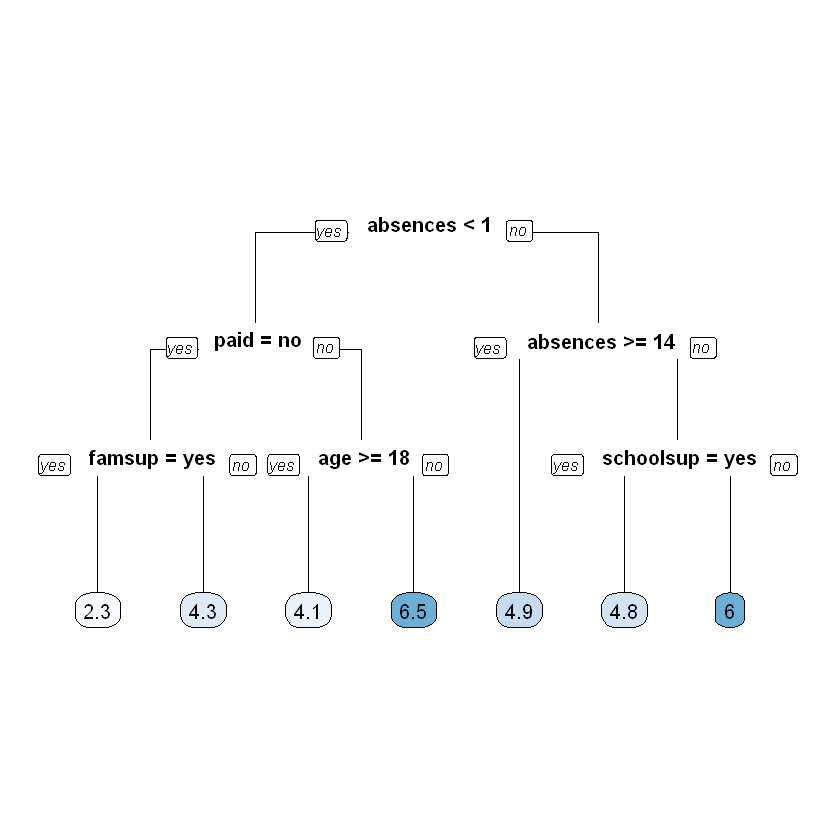

In [29]:
# Plot the "CP Table"
plotcp(grade_model)

# Print the "CP Table"
print(grade_model$cptable)

# Retrieve optimal cp value based on cross-validated error
opt_index <- which.min(grade_model$cptable[, "xerror"])
cp_opt <- grade_model$cptable[opt_index , "CP"]

# Prune the model (to optimized cp value)
grade_model_opt <- prune(tree = grade_model, 
                           cp = cp_opt)
                          
# Plot the optimized model
rpart.plot(x = grade_model_opt, yesno = 2, type = 0, extra = 0)

In [30]:
# Generate a grid of hyperparameter values
# Use expand.grid() to generate a grid of maxdepth and minsplit values.
# 
# Instructions
# 
# Establish a list of possible values for minsplit and maxdepth
# Use the expand.grid() function to generate a data frame containing all combinations
# Take a look at the resulting grid object

In [31]:
# Establish a list of possible values for minsplit and maxdepth
minsplit <- seq(1, 4, 1)
maxdepth <- seq(1, 6, 1)

# Create a data frame containing all combinations 
hyper_grid <-  expand.grid(minsplit = minsplit, maxdepth = maxdepth)

# Check out the grid
head(hyper_grid)

# Print the number of grid combinations
nrow(hyper_grid)

,minsplit,maxdepth
,<dbl>,<dbl>
1,1,1
2,2,1
3,3,1
4,4,1
5,1,2
6,2,2


[1] 24

In [32]:
# Generate a grid of models
# 
# In this exercise, we will write a simple loop to train a "grid" of models
# and store the models in a list called grade_models. R users who are familiar with 
# the apply functions in R could think about how this loop could be easily converted 
# into a function applied to a list as an extra-credit thought experiment.
# 
# Instructions
# 
# Create an empty list to store the models from the grid search.
# Write a loop that trains a model for each row in hyper_grid and adds it to the grade_models list.
# The loop will by indexed by the rows of hyper_grid.
# For each row, there is a unique combination of the minsplit and maxdepth values that will be used to train a model.

In [33]:
# Number of potential models in the grid
num_models <- nrow(hyper_grid)

# Create an empty list to store models
grade_models <- list()

# Write a loop over the rows of hyper_grid to train the grid of models
for (i in 1:num_models) {

    # Get minsplit, maxdepth values at row i
    minsplit <- hyper_grid$minsplit[i]
    maxdepth <- hyper_grid$maxdepth[i]

    # Train a model and store in the list
    grade_models[[i]] <- rpart(formula = final_grade ~ ., 
                               data = grade_train, 
                               method = "anova",
                               minsplit = minsplit,
                               maxdepth = maxdepth)
}

In [34]:
# Evaluate the grid
# 
# Earlier in the chapter we split the dataset into three parts: training, validation and test.
# 
# A dataset that is not used in training is sometimes referred to as a "holdout" set. 
# A holdout set is used to estimate model performance and although both 
# validation and test sets are considered to be holdout data, there is a key difference:
# 
# Just like a test set, a validation set is used to evaluate the performance of a model. 
# The difference is that a validation set is specifically used to compare the performance 
# of a group of models with the goal of choosing a "best model" from the group. 
# All the models in a group are evaluated on the same validation set and the model with 
# the best performance is considered to be the winner.
# 
# Once you have the best model, a final estimate of performance is computed on the test set.
# A test set should only ever be used to estimate model performance and should not be used in model selection. 
# Typically if you use a test set more than once, you are probably doing something wrong.
# 
# Instructions
# 
# Write a loop that evaluates each model in the grade_models list and stores 
# the validation RMSE in a vector called rmse_values.
# 
# The which.min() function can be applied to the rmse_values vector to identify 
# the index containing the smallest RMSE value.
# 
# The model with the smallest validation set RMSE will be designated as the "best model".
# Inspect the model parameters of the best model.
# Generate predictions on the test set using the best model to compute test set RMSE.

In [35]:
# Number of potential models in the grid
num_models <- length(grade_models)

# Create an empty vector to store RMSE values
rmse_values <- c()

# Write a loop over the models to compute validation RMSE
for (i in 1:num_models) {

    # Retrieve the i^th model from the list
    model <- grade_models[[i]]
    
    # Generate predictions on grade_valid 
    pred <- predict(object = model,
                      newdata = grade_valid)
    
    # Compute validation RMSE and add to the 
    rmse_values[i] <- rmse(actual = grade_valid$final_grade, 
                             predicted = pred)
}

# Identify the model with smallest validation set RMSE
best_model <- grade_models[[which.min(rmse_values)]]

# Print the model paramters of the best model
best_model$control

# Compute test set RMSE on best_model
pred <- predict(object =best_model,
                  newdata = grade_test)
rmse(actual = grade_test$final_grade, 
       predicted = pred)

$minsplit
[1] 2

$minbucket
[1] 1

$cp
[1] 0.01

$maxcompete
[1] 4

$maxsurrogate
[1] 5

$usesurrogate
[1] 2

$surrogatestyle
[1] 0

$maxdepth
[1] 1

$xval
[1] 10

[1] 2.124109

# 3. Bagged Trees

In this chapter, you will learn about Bagged Trees, an ensemble method, that uses a combination of trees (instead of only one).

In [36]:
# Train a bagged tree model
# 
# Let's start by training a bagged tree model. You'll be using the bagging() function from the ipred package. 
# The number of bagged trees can be specified using the nbagg parameter, 
# but here we will use the default (25).
# 
# If we want to estimate the model's accuracy using the "out-of-bag" (OOB) samples, 
# we can set the the coob parameter to TRUE. The OOB samples are the training obsevations 
# that were not selected into the bootstrapped sample (used in training). 
# Since these observations were not used in training, we can use them instead to evaluate 
# the accuracy of the model (done automatically inside the bagging() function).
# 
# Instructions
# 
# The credit_train and credit_test datasets from Chapter 1 are already loaded in the workspace.
# Use the bagging() function to train a bagged tree model.
# Inspect the model by printing it.

In [37]:
# Bagging is a randomized model, so let's set a seed (123) for reproducibility
set.seed(123)

# Train a bagged model
credit_model <- bagging(formula = default ~ ., 
                        data = credit_train,
                        coob = TRUE)

# Print the model
print(credit_model)


Bagging classification trees with 25 bootstrap replications 

Call: bagging.data.frame(formula = default ~ ., data = credit_train, 
    coob = TRUE)

Out-of-bag estimate of misclassification error:  0.2537 



In [38]:
# Prediction and confusion matrix
# 
# As you saw in the video, a confusion matrix is a very useful tool for examining 
# all possible outcomes of your predictions (true positive, true negative, false positive, false negative).
# 
# In this exercise, you will predict those who will default using bagged trees. 
# You will also create the confusion matrix using the confusionMatrix() function from the caret package.
# 
# It's always good to take a look at the output using the print() function.
# 
# Instructions
# 
# The fitted model object, credit_model, is already in your workspace.
# 
# Use the predict() function with type = "class" to generate predicted labels on the credit_test dataset.
# Take a look at the prediction using the print() function.
# Calculate the confusion matrix using the confusionMatrix function.

In [39]:
# Generate predicted classes using the model object
class_prediction <- predict(object = credit_model,    
                              newdata = credit_test,  
                            type = "class")  # return classification labels

# Print the predicted classes
print(class_prediction)

# Calculate the confusion matrix for the test set
confusionMatrix(data = class_prediction ,       
                  reference = credit_test$default) 

  [1] no  no  no  no  yes no  no  no  no  no  no  no  no  yes no  no  no  no 
 [19] no  no  yes no  no  no  no  no  yes no  no  no  no  no  no  no  no  no 
 [37] yes yes no  yes no  yes no  no  no  no  no  no  no  yes no  yes no  yes
 [55] yes no  yes no  yes no  no  yes no  no  yes yes no  yes no  no  no  yes
 [73] yes no  no  no  no  no  no  yes no  no  no  no  yes no  no  yes no  no 
 [91] no  no  no  yes yes no  no  no  no  no  no  yes no  no  yes no  no  no 
[109] no  no  no  no  no  no  no  no  no  no  no  no  yes no  yes no  no  yes
[127] yes no  yes no  no  no  no  no  yes no  yes yes no  no  no  no  yes no 
[145] no  no  yes no  no  no  no  yes no  no  no  no  no  no  no  yes no  no 
[163] yes no  yes no  no  no  no  no  no  no  no  no  no  no  no  no  no  no 
[181] no  no  yes yes yes no  yes no  no  no  no  no  yes no  no  no  yes no 
[199] no  yes
Levels: no yes


Confusion Matrix and Statistics

          Reference
Prediction  no yes
       no  119  33
       yes  11  37
                                          
               Accuracy : 0.78            
                 95% CI : (0.7161, 0.8354)
    No Information Rate : 0.65            
    P-Value [Acc > NIR] : 4.557e-05       
                                          
                  Kappa : 0.4787          
                                          
 Mcnemar's Test P-Value : 0.001546        
                                          
            Sensitivity : 0.9154          
            Specificity : 0.5286          
         Pos Pred Value : 0.7829          
         Neg Pred Value : 0.7708          
             Prevalence : 0.6500          
         Detection Rate : 0.5950          
   Detection Prevalence : 0.7600          
      Balanced Accuracy : 0.7220          
                                          
       'Positive' Class : no              
                              

In [40]:
# Predict on a test set and compute AUC
# 
# In binary classification problems, we can predict numeric values instead of class labels. 
# In fact, class labels are created only after you use the model to predict a raw, 
# numeric, predicted value for a test point.
# 
# The predicted label is generated by applying a threshold to the predicted value, 
# such that all tests points with predicted value greater than that threshold 
# get a predicted label of "1" and, points below that threshold get a predicted label of "0".
# 
# In this exercise, generate predicted values (rather than class labels) on the test set 
# and evaluate performance based on AUC (Area Under the ROC Curve). 
# The AUC is a common metric for evaluating the discriminatory ability of a binary classification model.
# 
# Instructions
# 
# Use the predict() function with type = "prob" to generate numeric predictions on the credit_test dataset.
# Compute the AUC using the auc() function from the Metrics package.

In [41]:
# Generate predictions on the test set
pred <- predict(object = credit_model,
                  newdata = credit_test,
                  type = "prob")

# `pred` is a matrix
class(pred)
                
# Look at the pred format
head(pred)
                
# Compute the AUC (`actual` must be a binary (or 1/0 numeric) vector)
auc(actual = ifelse(credit_test$default == "yes", 1, 0), 
    predicted = pred[,"yes"])                    

[1] "matrix"

no,yes
0.92,0.08
0.92,0.08
1.00,0.00
1.00,0.00
0.16,0.84
0.84,0.16


[1] 0.8084066

In [42]:
# Cross-validate a bagged tree model in caret
# 
# Use caret::train() with the "treebag" method to train a model and evaluate the model using cross-validated AUC. 
# The caret package allows the user to easily cross-validate any model across any relevant performance metric. 
# In this case, we will use 5-fold cross validation and evaluate cross-validated AUC (Area Under the ROC Curve).
# 
# Instructions
# The credit_train dataset is in your workspace. 
# You will use this data frame as the training data.
# 
# First specify a ctrl object, which is created using the caret::trainControl() function.
# In the trainControl() function, you can specify many things. 
# We will set: method = "cv", number = 5 for 5-fold cross-validation. 
# Also, two options that are required if you want to use AUC as the metric: 
# classProbs = TRUE and summaryFunction = twoClassSummary.

In [43]:
# Specify the training configuration
ctrl <- trainControl(method = "cv",     # Cross-validation
                     number = 5,      # 5 folds
                     classProbs = TRUE,                  # For AUC
                     summaryFunction = twoClassSummary)  # For AUC

# Cross validate the credit model using "treebag" method; 
# Track AUC (Area under the ROC curve)
set.seed(1)  # for reproducibility
credit_caret_model <- train(default ~ .,
                            data = credit_train, 
                            method = "treebag",
                            metric = "ROC",
                            trControl = ctrl)

# Look at the model object
print(credit_caret_model)

# Inspect the contents of the model list 
names(credit_caret_model)

# Print the CV AUC
credit_caret_model$results[,"ROC"]

Bagged CART 

800 samples
 16 predictor
  2 classes: 'no', 'yes' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 640, 640, 640, 640, 640 
Resampling results:

  ROC       Sens       Spec     
  0.744508  0.8736842  0.4173913



[1] "method"       "modelInfo"    "modelType"    "results"      "pred"        
 [6] "bestTune"     "call"         "dots"         "metric"       "control"     
[11] "finalModel"   "preProcess"   "trainingData" "resample"     "resampledCM" 
[16] "perfNames"    "maximize"     "yLimits"      "times"        "levels"      
[21] "terms"        "coefnames"    "contrasts"    "xlevels"

[1] 0.744508

In [44]:
# Generate predictions from the caret model
# Generate predictions on a test set for the caret model.
# 
# Instructions
# 
# First generate predictions on the credit_test data frame using the credit_caret_model object.
# After generating test set predictions, use the auc() function from the Metrics package to compute AUC.

In [45]:
# Generate predictions on the test set
pred <- predict(object = credit_caret_model, 
                  newdata = credit_test,
                  type = "prob")
# Compute the AUC (`actual` must be a binary (or 1/0 numeric) vector)
auc(actual = ifelse(credit_test$default == "yes", 1, 0), 
                      predicted = pred[,"yes"])

[1] 0.7831868

In [46]:
# Compare test set performance to CV performance
# 
# In this excercise, you will print test set AUC estimates that you computed in previous exercises. 
# These two methods use the same code underneath, so the estimates should be very similar.
# 
# The credit_ipred_model_test_auc object stores the test set AUC from 
# the model trained using the ipred::bagging() function.
# 
# The credit_caret_model_test_auc object stores the test set AUC from 
# the model trained using the caret::train() function with method = "treebag".
# 
# Lastly, we will print the 5-fold cross-validated estimate of AUC that is stored within 
# the credit_caret_model object. This number will be a more accurate estimate of 
# the true model performance since we have averaged the performance over five models instead of just one.
# 
# On small datasets like this one, the difference between test set model performance estimates 
# and cross-validated model performance estimates will tend to be more pronounced. 
# When using small data, it's recommended to use cross-validated estimates of performance because they are more stable.
# 
# Instructions
# 
# Print the object credit_ipred_model_test_auc.
# Print the object credit_caret_model_test_auc.
# Compare these to the 5-fold cross validated AUC.

In [47]:
# Print ipred::bagging test set AUC estimate
#print(credit_ipred_model_test_auc)

# Print caret "treebag" test set AUC estimate
#print(credit_caret_model_test_auc)
                
# Compare to caret 5-fold cross-validated AUC
credit_caret_model$results[, "ROC"]

[1] 0.744508

# 4. Random Forests

In this chapter, you will learn about the Random Forest algorithm, another tree-based ensemble method. Random Forest is a modified version of bagged trees with better performance. Here you'll learn how to train, tune and evaluate Random Forest models in R.

In [48]:
# Train a Random Forest model
# Here you will use the randomForest() function from the randomForest package to train 
# a Random Forest classifier to predict loan default.
# 
# Instructions
# 
# The credit_train and credit_test datasets (from Chapter 1 & 3) are already loaded in the workspace.
# 
# Use the randomForest::randomForest() function to train a Random Forest model on the credit_train dataset.
# The formula used to define the model is the same as in previous chapters -- 
# we want to predict "default" as a function of all the other columns in the training set.
# Inspect the model output.

In [49]:
url = 'https://assets.datacamp.com/production/repositories/710/datasets/b649085c43111c83ba7ab6ec172d83cdc14a2942/credit.csv'
credit <- fread(url,colClasses=c(default="factor",checking_balance="factor",credit_history="factor",purpose="factor",savings_balance="factor",employment_duration="factor",other_credit="factor",housing="factor",
job="factor",phone="factor"))

In [50]:
sum(is.na(credit_train))

[1] 0

In [51]:
# Total number of rows in the credit data frame
n <- nrow(credit)

# Number of rows for the training set (80% of the dataset)
n_train <- round(0.8 * n)

# Create a vector of indices which is an 80% random sample
set.seed(123)
train_indices <- sample(1:n,n_train)

# Subset the credit data frame to training indices only
credit_train <- credit[train_indices, ]  
  
# Exclude the training indices to create the test set
credit_test <- credit[-train_indices, ]

In [52]:
# Train a Random Forest
#set.seed(1)  # for reproducibility
credit_model <- randomForest(formula = default ~ ., 
                               data = credit_train)
# Print the model output
print(credit_model)


Call:
 randomForest(formula = default ~ ., data = credit_train) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 24.75%
Confusion matrix:
     no yes class.error
no  521  49  0.08596491
yes 149  81  0.64782609


In [53]:
# Evaluate out-of-bag error
# 
# Here you will plot the OOB error as a function of the number of trees trained, 
# and extract the final OOB error of the Random Forest model from the trained model object.
# 
# Instructions
# 
# The credit_model trained in the previous exercise is loaded in the workspace.
# Get the OOB error rate for the Random Forest model.
# Plot the OOB error rate against the number of trees in the forest.

OOB,no,yes
0.3183391,0.2441315,0.5263158
0.3088235,0.2235294,0.5220588
0.2988506,0.2078522,0.5227273
0.2965116,0.1930894,0.5561224
0.2946794,0.1873805,0.5619048
0.2883355,0.1783088,0.5616438


   OOB 
0.2475 


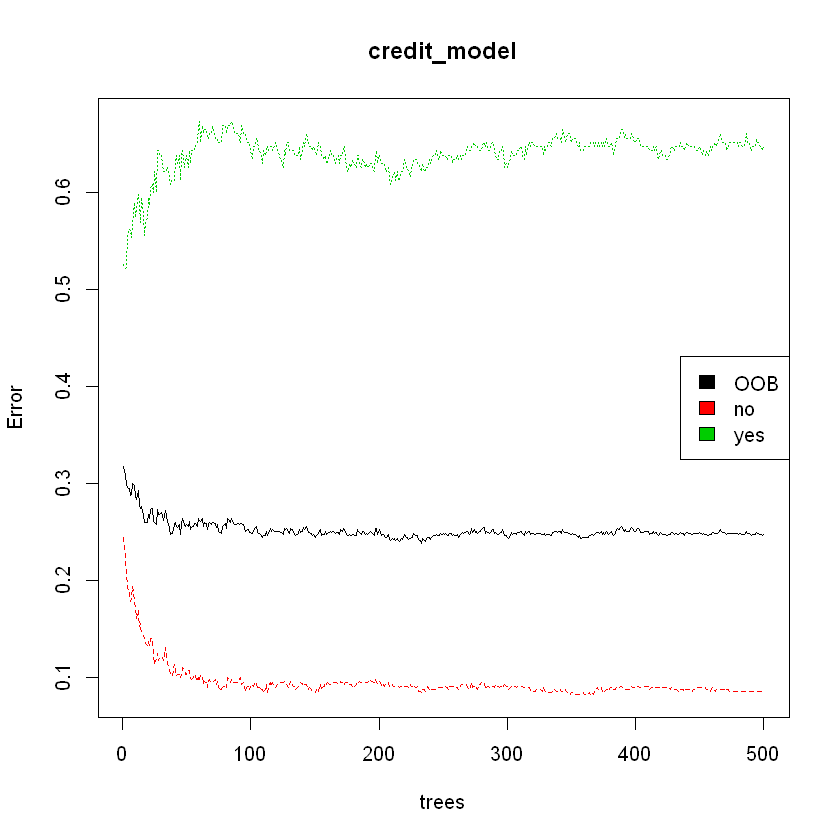

In [54]:
# Grab OOB error matrix & take a look
err <- credit_model$err.rate
head(err)

# Look at final OOB error rate (last row in err matrix)
oob_err <- err[500, "OOB"]
print(oob_err)

# Plot the model trained in the previous exercise
plot(credit_model)

# Add a legend since it doesn't have one by default
legend(x = "right", 
       legend = colnames(err),
       fill = 1:ncol(err))

In [55]:
# Evaluate model performance on a test set
# 
# Use the caret::confusionMatrix() function to compute test set accuracy and generate a confusion matrix. 
# Compare the test set accuracy to the OOB accuracy.
# 
# Instructions
# 
# Generate class predictions for the credit_test data frame using the credit_model object.
# Using the caret::confusionMatrix() function, compute the confusion matrix for the test set.
# Compare the test set accuracy reported from the confusion matrix to the OOB accuracy. 
# The OOB error is stored in oob_err, which is already in your workspace, and so OOB accuracy is just 1 - oob_err.

In [56]:
# Generate predicted classes using the model object
class_prediction <- predict(object = credit_model,   # model object 
                              newdata = credit_test,  # test dataset
                              type = "class") # return classification labels
                            
# Calculate the confusion matrix for the test set
cm <- confusionMatrix(data =class_prediction,       # predicted classes
                        reference = credit_test$default)  # actual classes
print(cm)

# Compare test set accuracy to OOB accuracy
paste0("Test Accuracy: ", cm$overall[1])
paste0("OOB Accuracy: ", 1 - oob_err)

Confusion Matrix and Statistics

          Reference
Prediction  no yes
       no  122  41
       yes   8  29
                                          
               Accuracy : 0.755           
                 95% CI : (0.6894, 0.8129)
    No Information Rate : 0.65            
    P-Value [Acc > NIR] : 0.0009148       
                                          
                  Kappa : 0.3958          
                                          
 Mcnemar's Test P-Value : 4.844e-06       
                                          
            Sensitivity : 0.9385          
            Specificity : 0.4143          
         Pos Pred Value : 0.7485          
         Neg Pred Value : 0.7838          
             Prevalence : 0.6500          
         Detection Rate : 0.6100          
   Detection Prevalence : 0.8150          
      Balanced Accuracy : 0.6764          
                                          
       'Positive' Class : no              
                              

[1] "Test Accuracy: 0.755"

[1] "OOB Accuracy: 0.7525"

In [57]:
# Evaluate test set AUC
# 
# In Chapter 3, we learned about the AUC metric for evaluating binary classification models. 
# In this exercise, you will compute test set AUC for the Random Forest model.
# 
# Instructions
# 
# Use the predict() function with type = "prob" to generate numeric predictions on the credit_test dataset.
# Compute the AUC using the auc() function from the Metrics package.

In [58]:
# Generate predictions on the test set
pred <- predict(object = credit_model,
              newdata = credit_test,
              type = "prob")

# `pred` is a matrix
class(pred)
                
# Look at the pred format
head(pred)
                
# Compute the AUC (`actual` must be a binary 1/0 numeric vector)
auc(actual = ifelse(credit_test$default == "yes", 1, 0), 
      predicted = pred[,"yes"])                   

[1] "matrix" "votes"

,no,yes
1,0.912,0.088
2,0.844,0.156
3,0.986,0.014
4,0.966,0.034
5,0.210,0.790
6,0.844,0.156


[1] 0.8158242

In [59]:
# Tuning a Random Forest via mtry
# 
# In this exercise, you will use the randomForest::tuneRF() to tune mtry (by training several models). 
# This function is a specific utility to tune the mtry parameter based on OOB error, 
# which is helpful when you want a quick & easy way to tune your model. 
# A more generic way of tuning Random Forest parameters will be presented in the following exercise.
# 
# Instructions
# 
# Use the tuneRF() function in place of the randomForest() function to train a series of models 
# with different mtry values and examine the the results.
# 
# Note that (unfortunately) the tuneRF() interface does not support the typical formula input 
# that we've been using, but instead uses two arguments, 
# x (matrix or data frame of predictor variables) and y (response vector; must be a factor for classification).
# 
# The tuneRF() function has an argument, ntreeTry that defaults to 50 trees. 
# Set nTreeTry = 500 to train a random forest model of the same size as you previously did.
# 
# After tuning the forest, this function will also plot model performance (OOB error) 
# as a function of the mtry values that were evaluated.
# 
# Keep in mind that if we want to evaluate the model based on AUC instead of error (accuracy), 
# then this is not the best way to tune a model, as the selection only considers (OOB) error.

mtry = 4  OOB error = 24.12% 
Searching left ...
mtry = 2 	OOB error = 24.5% 
-0.01554404 0.05 
Searching right ...
mtry = 8 	OOB error = 23.88% 
0.01036269 0.05 
      mtry OOBError
2.OOB    2  0.24500
4.OOB    4  0.24125
8.OOB    8  0.23875
8.OOB 
    8 


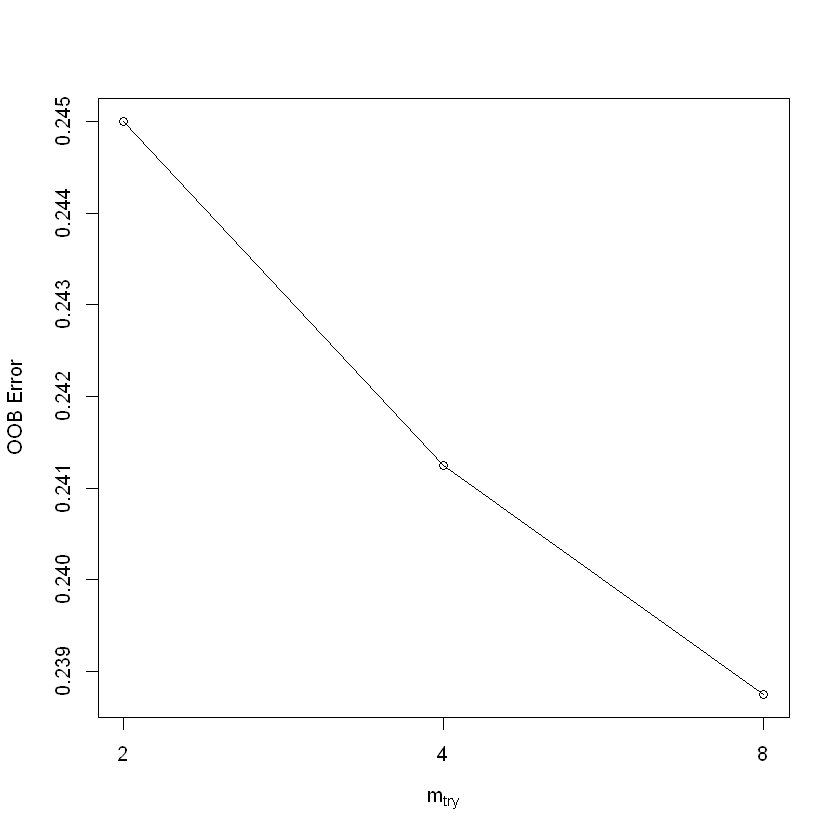

In [60]:
# Execute the tuning process
set.seed(1)              
res <-  tuneRF(x = subset(credit_train, select = -default),
                y = credit_train$default,
                ntreeTry = 500)
               
# Look at results
print(res)

# Find the mtry value that minimizes OOB Error
mtry_opt <- res[,"mtry"][which.min(res[,"OOBError"])]
print(mtry_opt)

# If you just want to return the best RF model (rather than results)
# you can set `doBest = TRUE` in `tuneRF()` to return the best RF model
# instead of a set performance matrix.

In [61]:
# Tuning a Random Forest via tree depth
# 
# In Chapter 2, we created a manual grid of hyperparameters using the expand.grid() function 
# and wrote code that trained and evaluated the models of the grid in a loop. 
# In this exercise, you will create a grid of mtry, nodesize and sampsize values. 
# In this example, we will identify the "best model" based on OOB error. 
# The best model is defined as the model from our grid which minimizes OOB error.
# 
# Keep in mind that there are other ways to select a best model from a grid, 
# such as choosing the best model based on validation AUC. 
# However, for this exercise, we will use the built-in OOB error calculations 
# instead of using a separate validation set.
# 
# Instructions
# Create a grid of mtry, nodesize and sampsize values.
# Write a simple loop to train all the models and choose the best one based on OOB error.
# Print the set of hyperparameters which produced the best model.

In [62]:
# Establish a list of possible values for mtry, nodesize and sampsize
mtry <- seq(4, ncol(credit_train) * 0.8, 2)
nodesize <- seq(3, 8, 2)
sampsize <- nrow(credit_train) * c(0.7, 0.8)

# Create a data frame containing all combinations 
hyper_grid <- expand.grid(mtry = mtry, nodesize = nodesize, sampsize = sampsize)

# Create an empty vector to store OOB error values
oob_err <- c()

# Write a loop over the rows of hyper_grid to train the grid of models
for (i in 1:nrow(hyper_grid)) {
  
      # Train a Random Forest model
      model <- randomForest(formula = default ~ ., 
                            data = credit_train,
                            mtry = hyper_grid$mtry[i],
                            nodesize = hyper_grid$nodesize[i],
                            sampsize = hyper_grid$sampsize[i])
                          
    # Store OOB error for the model                      
    oob_err[i] <- model$err.rate[nrow(model$err.rate), "OOB"]
}

# Identify optimal set of hyperparmeters based on OOB error
opt_i <- which.min(oob_err)
print(hyper_grid[opt_i,])

   mtry nodesize sampsize
17    6        3      640


# 5. Boosted Trees

In this chapter, you will see the boosting methodology with a focus on the Gradient Boosting Machine (GBM) algorithm, another popular tree-based ensemble method. Here you'll learn how to train, tune and evaluate GBM models in R.

In [63]:
# Train a GBM model
# 
# Here you will use the gbm() function to train a GBM classifier to predict loan default. 
# You will train a 10,000-tree GBM on the credit_train dataset, which is pre-loaded into your workspace.
# 
# Using such a large number of trees (10,000) is probably not optimal for a GBM model, 
# but we will build more trees than we need and then select the optimal number of 
# trees based on early performance-based stopping. 
# The best GBM model will likely contain fewer trees than we started with.
# 
# For binary classification, gbm() requires the response to be encoded as 0/1 (numeric), 
# so we will have to convert from a "no/yes" factor to a 0/1 numeric response column.
# 
# Also, the the gbm() function requires the user to specify a distribution argument. 
# For a binary classification problem, you should set distribution = "bernoulli". 
# The Bernoulli distribution models a binary response.
# 
# Instructions
# 
# Convert from a "no/yes" factor to a 0/1 numeric response column using the ifelse() function.
# Train a 10,000-tree GBM model.

gbm(formula = default ~ ., distribution = "bernoulli", data = credit_train, 
    n.trees = 10000)
A gradient boosted model with bernoulli loss function.
10000 iterations were performed.
There were 16 predictors of which 16 had non-zero influence.


,var,rel.inf
,<fct>,<dbl>
amount,amount,22.0897595
age,age,17.9626175
credit_history,credit_history,10.6369658
purpose,purpose,10.2584546
employment_duration,employment_duration,8.8596192
checking_balance,checking_balance,6.4650840
months_loan_duration,months_loan_duration,5.8863990
savings_balance,savings_balance,3.7722735
job,job,2.9418015


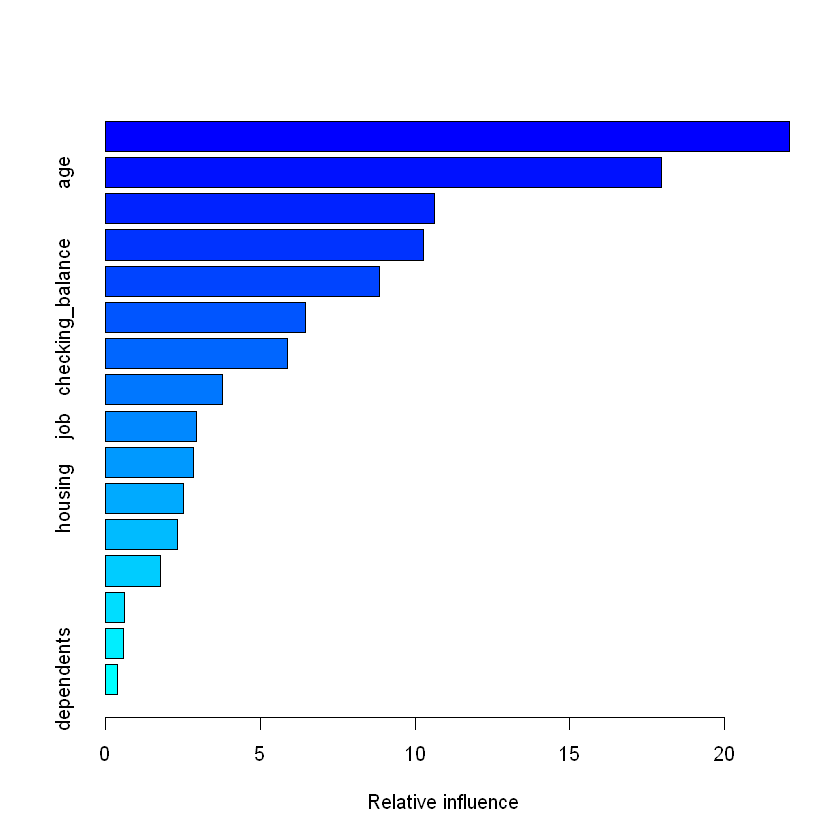

In [64]:
# Convert "yes" to 1, "no" to 0
credit_train$default <- ifelse(credit_train$default == "yes", 1, 0)

# Train a 10000-tree GBM model
set.seed(1)
credit_model <- gbm(formula = default ~ ., 
                      distribution = "bernoulli", 
                      data =credit_train,
                      n.trees = 10000)
                    
# Print the model object                    
print(credit_model)

# summary() prints variable importance
summary(credit_model)

In [65]:
# Prediction using a GBM model
# The gbm package uses a predict() function to generate predictions from a model, 
# similar to many other machine learning packages in R. 
# When you see a function like predict() that works on many different types of input 
# (a GBM model, a RF model, a GLM model, etc), that indicates that predict() 
# is an "alias" for a GBM-specific version of that function. 
# The GBM specific version of that function is predict.gbm(), 
# but for convenience sake, we can just use predict() (either works).
# 
# One thing that's particular to the predict.gbm() however, 
# is that you need to specify the number of trees used in the prediction. 
# There is no default, so you have to specify this manually. 
# For now, we can use the same number of trees that we specified when training the model, 
# which is 10,000 (though this may not be the optimal number to use).
# 
# Another argument that you can specify is type, 
# which is only relevant to Bernoulli and Poisson distributed outcomes. 
# When using Bernoulli loss, the returned value is on the log odds scale by default and for Poisson, 
# it's on the log scale. If instead you specify type = "response", 
# then gbm converts the predicted values back to the same scale as the outcome. 
# This will convert the predicted values into probabilities for Bernoulli and expected counts for Poisson.
# 
# Instructions
# 
# Generate predictions on the test set, using 10,000 trees.
# Generate predictions on the test set using type = "response" and 10,000 trees.
# Compare the ranges of the two sets of predictions.

In [66]:
# Since we converted the training response col, let's also convert the test response col
credit_test$default <- ifelse(credit_test$default == "yes", 1, 0)

# Generate predictions on the test set
preds1 <- predict(object = credit_model, 
                    newdata = credit_test,
                    n.trees = 10000)

# Generate predictions on the test set (scale to response)
preds2 <- predict(object = credit_model, 
                    newdata = credit_test,
                    n.trees = 10000,
                    type = "response")

# Compare the range of the two sets of predictions
range(preds1)
range(preds2)

[1] -6.004812  4.646991

[1] 0.002460783 0.990500685

In [67]:
# Evaluate test set AUC
# 
# Compute test set AUC of the GBM model for the two sets of predictions. 
# We will notice that they are the same value. That's because AUC is a rank-based metric, 
# so changing the actual values does not change the value of the AUC.
# 
# However, if we were to use a scale-aware metric like RMSE to evaluate performance, 
# we would want to make sure we converted the predictions back to the original scale of the response.
# 
# Instructions
# The preds1 and preds2 prediction vectors from the previous exercise are pre-loaded into the workspace.
# 
# Compute AUC of the predictions.
# Compute AUC of the predictions (scaled to response).
# Notice that the AUC is the same!

In [68]:
# Generate the test set AUCs using the two sets of preditions & compare
auc(actual = credit_test$default, predicted = preds1)  #default
auc(actual = credit_test$default, predicted = preds2)  #rescaled

[1] 0.7142857

[1] 0.7142857

In [69]:
# Early stopping in GBMs
# 
# Use the gbm.perf() function to estimate the optimal number of boosting iterations (aka n.trees) 
# for a GBM model object using both OOB and CV error. When you set out to train a large number of trees in a GBM 
# (such as 10,000) and you use a validation method to determine an earlier (smaller) number of trees, 
# then that's called "early stopping". The term "early stopping" is not unique to GBMs, 
# but can describe auto-tuning the number of iterations in an iterative learning algorithm.
# 
# Instructions
# The credit_model object is loaded in the workspace.
# Use the gbm.perf() function with the "OOB" method to get the optimal number of trees based 
# on the OOB error and store that number as ntree_opt_oob.
# Train a new GBM model, this time with cross-validation, so we can get a cross-validated estimate 
# of the optimal number of trees.
# Lastly, use the gbm.perf() function with the "cv" method to get the optimal number of trees based
# on the CV error and store that number as ntree_opt_cv.
# Compare the two numbers.

OOB generally underestimates the optimal number of iterations although predictive performance is reasonably competitive. Using cv_folds>1 when calling gbm usually results in improved predictive performance.



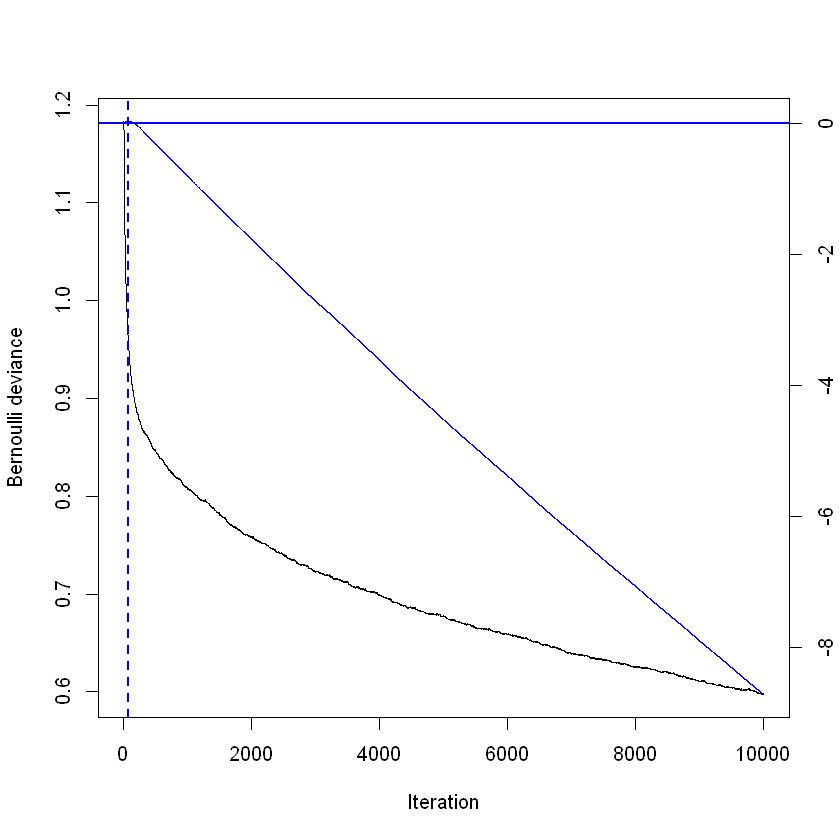

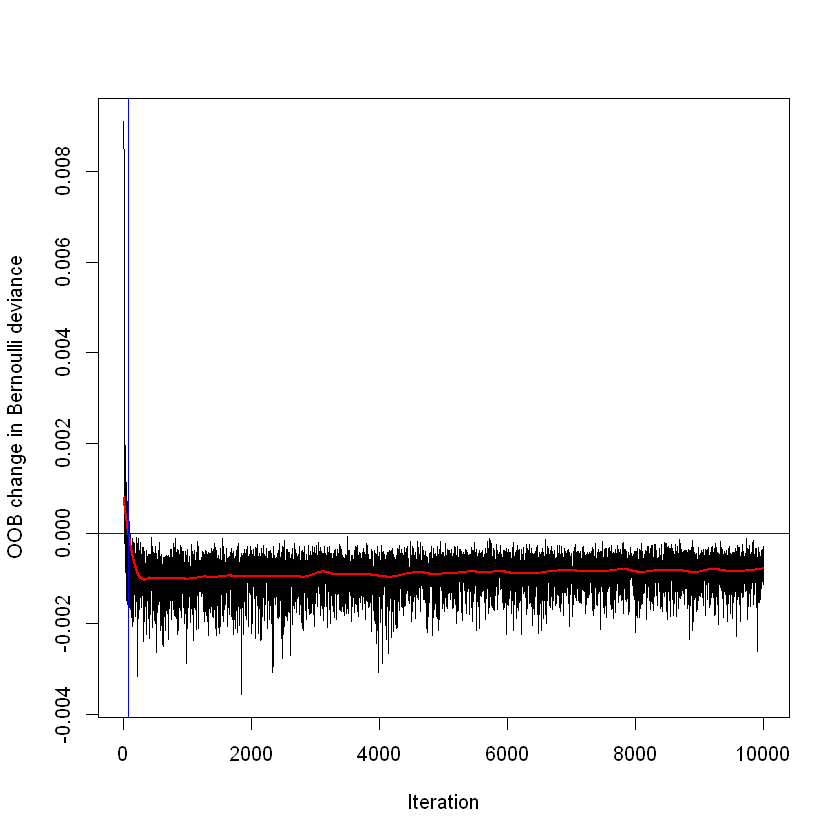

[1] "Optimal n.trees (OOB Estimate): 76"
[1] "Optimal n.trees (CV Estimate): 139"


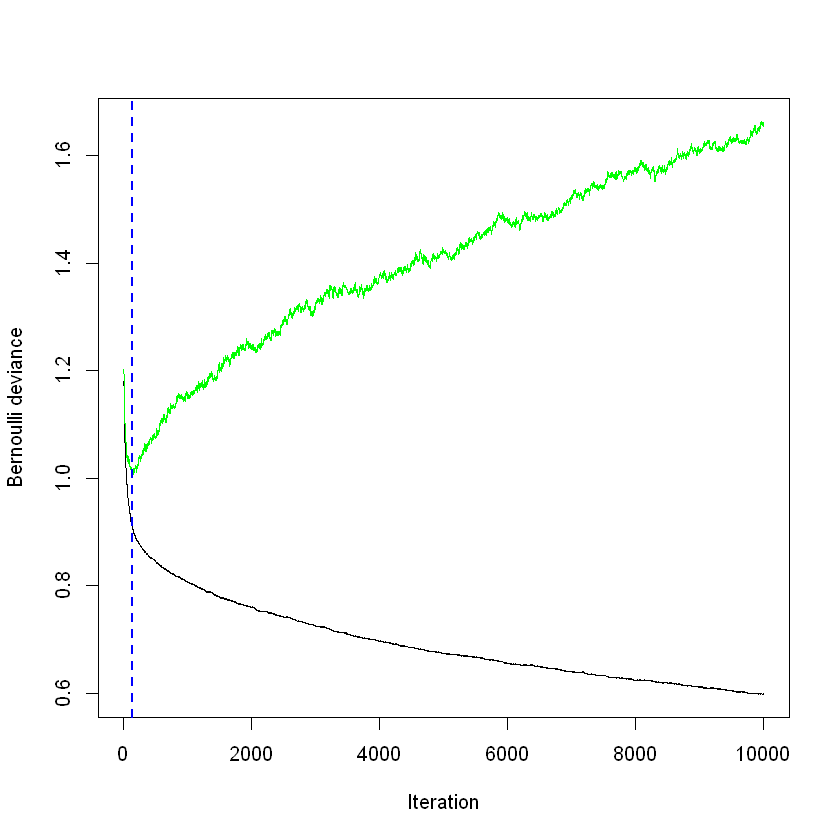

In [70]:
# Optimal ntree estimate based on OOB
ntree_opt_oob <- gbm.perf(object = credit_model, 
                            method = "OOB", 
                            oobag.curve = TRUE)

# Train a CV GBM model
set.seed(1)
credit_model_cv <- gbm(formula = default ~ ., 
                       distribution = "bernoulli", 
                       data = credit_train,
                       n.trees = 10000,
                       cv.folds = 2,
                       n.cores = 1)

# Optimal ntree estimate based on CV
ntree_opt_cv <- gbm.perf(object = credit_model_cv, 
                           method ="cv")
 
# Compare the estimates                         
print(paste0("Optimal n.trees (OOB Estimate): ", ntree_opt_oob))                         
print(paste0("Optimal n.trees (CV Estimate): ", ntree_opt_cv))

In [71]:
# OOB vs CV-based early stopping
# 
# In the previous exercise, we used OOB error and cross-validated error to estimate 
# the optimal number of trees in the GBM. These are two different ways to estimate the optimal number of trees, 
# so in this exercise we will compare the performance of the models on a test set. 
# We can use the same model object to make both of these estimates since the predict.gbm() function 
# allows you to use any subset of the total number of trees (in our case, the total number is 10,000).
# 
# Instructions
# 
# The ntree_opt_oob and ntree_opt_cv objects from the previous exercise 
# (each storing an "optimal" value for n.trees) are loaded in the workspace.
# 
# Using the credit_model loaded in the workspace, generate two sets of predictions:
# 
# One using the OOB estimate of n.trees: 3,233 (stored in ntree_opt_oob)
# And the other using the CV estimate of n.trees: 7,889 (stored in ntree_opt_cv)

In [72]:
# Generate predictions on the test set using ntree_opt_oob number of trees
preds1 <- predict(object = credit_model, 
                    newdata = credit_test,
                    n.trees = ntree_opt_oob)
                  
# Generate predictions on the test set using ntree_opt_cv number of trees
preds2 <- predict(object = credit_model, 
                    newdata = credit_test,
                    n.trees = ntree_opt_cv)  

# Generate the test set AUCs using the two sets of preditions & compare
auc1 <- auc(actual = credit_test$default, predicted = preds1)  #OOB
auc2 <- auc(actual = credit_test$default, predicted = preds2)  #CV 

# Compare AUC 
print(paste0("Test set AUC (OOB): ", auc1))                         
print(paste0("Test set AUC (CV): ", auc2))

[1] "Test set AUC (OOB): 0.802527472527472"
[1] "Test set AUC (CV): 0.788241758241758"


In [73]:
# Compare all models based on AUC
# 
# In this final exercise, we will perform a model comparison across all types of models 
# that we've learned about so far: Decision Trees, Bagged Trees, Random Forest and Gradient Boosting Machine (GBM). 
# The models were all trained on the same training set, credit_train, and predictions were made for the credit_test dataset.
# 
# We have pre-loaded four sets of test set predictions, generated using the models 
# we trained in previous chapters (one for each model type). 
# The numbers stored in the prediction vectors are 
# the raw predicted values themselves -- not the predicted class labels. Using the raw predicted values, 
# we can calculate test set AUC for each model and compare the results.
# 
# Instructions
# Loaded in your workspace are four numeric vectors:
# 
# dt_preds
# bag_preds
# rf_preds
# gbm_preds
# These predictions were made on credit_test, which is also loaded into the workspace.
# 
# Apply the Metrics::auc() function to each of these vectors to calculate test set AUC. Recall that the higher the AUC, the better the model.

In [74]:
dt_preds <- c(0.379746835443038, 0.589473684210526, 0.379746835443038, 0.375, 0.197183098591549, 0.379746835443038, 0.197183098591549, 0.379746835443038, 0.589473684210526, 0.379746835443038, 0.375, 0.589473684210526, 0.589473684210526, 0.868421052631579, 0.589473684210526, 0.589473684210526, 0.197183098591549, 0.379746835443038, 0.379746835443038, 0.589473684210526, 0.589473684210526, 0.589473684210526, 0.197183098591549, 0.379746835443038, 0.379746835443038, 0.197183098591549, 0.1, 0.868421052631579, 0.589473684210526, 0.589473684210526, 0.379746835443038, 1, 0.589473684210526, 0.868421052631579, 0.1, 0.379746835443038, 0.197183098591549, 0.379746835443038, 0.589473684210526, 0.379746835443038, 0.379746835443038, 0.589473684210526, 0.589473684210526, 0.379746835443038, 0.379746835443038, 0.589473684210526, 0.197183098591549, 0.589473684210526, 0.868421052631579, 0.589473684210526, 0.589473684210526, 0.379746835443038, 0.197183098591549, 0.589473684210526, 0.197183098591549, 0.197183098591549, 0.589473684210526, 0.379746835443038, 0.304347826086956, 0.197183098591549, 0.589473684210526, 0.379746835443038, 0.197183098591549, 0.379746835443038, 0.304347826086956, 0.589473684210526, 0.589473684210526, 0.379746835443038, 0.379746835443038, 0.379746835443038, 0.379746835443038, 0.589473684210526, 0.304347826086956, 0.589473684210526, 0.197183098591549, 0.589473684210526, 0.379746835443038, 0.379746835443038, 0.379746835443038, 0.379746835443038, 0.197183098591549, 0.379746835443038, 0.379746835443038, 0.379746835443038, 0.197183098591549, 0.379746835443038, 0.197183098591549, 0.589473684210526, 0.379746835443038, 0.379746835443038, 0.589473684210526, 0.304347826086956, 0.379746835443038, 0.197183098591549, 0.197183098591549, 0.379746835443038, 0.379746835443038, 0.589473684210526, 0.379746835443038, 0.379746835443038, 0.589473684210526, 0.197183098591549, 0.379746835443038, 0.379746835443038, 0.589473684210526, 0.379746835443038, 0.379746835443038, 0.379746835443038, 0.379746835443038, 0.197183098591549, 0.589473684210526, 0.197183098591549, 0.1, 0.1, 0.589473684210526, 0.868421052631579, 0.379746835443038, 0.379746835443038, 0.304347826086956, 0.304347826086956, 0.379746835443038, 0.304347826086956, 0.589473684210526, 0.379746835443038, 0.589473684210526, 0.379746835443038, 0.197183098591549, 0.379746835443038, 0.868421052631579, 0.589473684210526, 0.589473684210526, 0.379746835443038, 0.379746835443038, 0.379746835443038, 0.197183098591549, 0.589473684210526, 0.868421052631579, 0.197183098591549, 0.197183098591549, 0.197183098591549, 0.379746835443038, 0.379746835443038, 0.868421052631579, 0.379746835443038, 0.589473684210526, 0.589473684210526, 0.1, 0.379746835443038, 0.375, 0.379746835443038, 0.589473684210526, 0.589473684210526, 0.379746835443038, 0.304347826086956, 0.379746835443038, 0.375, 0.379746835443038, 0.197183098591549, 0.375, 0.197183098591549, 0.197183098591549, 0.589473684210526, 0.197183098591549, 0.379746835443038, 0.379746835443038, 0.379746835443038, 0.589473684210526, 0.379746835443038, 0.379746835443038, 0.379746835443038, 0.379746835443038, 0.379746835443038, 0.589473684210526, 0.589473684210526, 0.589473684210526, 0.197183098591549, 0.379746835443038, 0.589473684210526, 0.379746835443038, 0.589473684210526, 0.379746835443038, 0.589473684210526, 0.379746835443038, 0.304347826086956, 0.379746835443038, 0.197183098591549, 0.589473684210526, 0.868421052631579, 0.379746835443038, 0.589473684210526, 0.379746835443038, 0.304347826086956, 0.589473684210526, 0.375, 0.197183098591549, 0.375, 0.379746835443038, 0.589473684210526, 0.379746835443038, 0.868421052631579)
bag_preds <- c(0.04, 0.72, 0.64, 0.24, 0.08, 0.52, 0.4, 0.56, 0.08, 0.08, 0.2, 0.68, 0.16, 0.88, 0.36, 0.16, 0.12, 0, 0.2, 0, 0.2, 0.2, 0.16, 0.84, 0.36, 0.2, 0.32, 0.88, 0.2, 0.68, 0.72, 0.68, 0.12, 0.4, 0.48, 0.2, 0.24, 0.24, 0.04, 0, 0.24, 0.16, 0.24, 0.52, 0, 0.28, 0.04, 0.6, 0.24, 0.72, 0.76, 0.12, 0.08, 0.52, 0.2, 0.2, 0, 0.04, 0.36, 0.08, 0.12, 0, 0, 0, 0.12, 0.56, 0.04, 0.44, 0.44, 0.24, 0.76, 0, 0.36, 0.72, 0.04, 0, 0.28, 0.32, 0.2, 0.28, 0.04, 0.32, 0.28, 0, 0, 0.24, 0.28, 0.48, 0.2, 0.36, 0.6, 0.16, 0.52, 0.36, 0.16, 0, 0.44, 0.68, 0.24, 0.24, 0.24, 0.32, 0.28, 0.36, 0.76, 0.32, 0, 0.16, 0.24, 0.2, 0.32, 0.32, 0.32, 0.48, 0.24, 0.4, 0.28, 0.2, 0.4, 0.36, 0.2, 0.24, 0.68, 0, 0, 0.32, 0.24, 0.24, 0.04, 0.4, 0.24, 0.32, 0.08, 0.48, 0.2, 0.36, 0.44, 0.24, 0.2, 0.24, 0.52, 0.08, 0.84, 0.44, 0.56, 0, 0.32, 0.32, 0.12, 0, 0.12, 0.16, 0.56, 0.2, 0, 0.2, 0.4, 0.28, 0, 0.48, 0.2, 0.68, 0, 0.24, 0.36, 0.12, 0.6, 0.52, 0.2, 0.36, 0.04, 0.04, 0.56, 0.72, 0.12, 0.08, 0.04, 0.44, 0.36, 0, 0.08, 0.84, 0.16, 0.08, 0.32, 0.2, 0.64, 0.32, 0.4, 0, 0.04, 0.52, 0.48, 0.36, 0.44, 0.2, 0.76, 0.12, 0.08, 0.8)
rf_preds <- c(0.106, 0.706, 0.586, 0.228, 0.24, 0.382, 0.426, 0.41, 0.13, 0.156, 0.33, 0.59, 0.184, 0.81, 0.334, 0.178, 0.184, 0.058, 0.268, 0.096, 0.266, 0.216, 0.244, 0.64, 0.43, 0.166, 0.29, 0.71, 0.264, 0.674, 0.588, 0.68, 0.134, 0.406, 0.488, 0.152, 0.098, 0.294, 0.036, 0.076, 0.218, 0.208, 0.282, 0.574, 0.078, 0.3, 0.054, 0.496, 0.344, 0.538, 0.6, 0.222, 0.2, 0.582, 0.258, 0.136, 0.064, 0.098, 0.402, 0.114, 0.16, 0.116, 0.104, 0.078, 0.126, 0.232, 0.014, 0.438, 0.274, 0.196, 0.622, 0.022, 0.366, 0.574, 0.104, 0.062, 0.318, 0.412, 0.402, 0.278, 0.184, 0.23, 0.298, 0.026, 0.084, 0.288, 0.134, 0.386, 0.144, 0.438, 0.66, 0.154, 0.304, 0.3, 0.094, 0.114, 0.46, 0.65, 0.248, 0.382, 0.36, 0.178, 0.164, 0.48, 0.638, 0.428, 0.04, 0.186, 0.168, 0.136, 0.422, 0.342, 0.488, 0.414, 0.32, 0.532, 0.322, 0.326, 0.32, 0.492, 0.15, 0.228, 0.344, 0.056, 0.024, 0.308, 0.452, 0.148, 0.24, 0.36, 0.162, 0.194, 0.202, 0.39, 0.154, 0.222, 0.496, 0.24, 0.25, 0.196, 0.458, 0.216, 0.774, 0.35, 0.636, 0.014, 0.496, 0.332, 0.176, 0.032, 0.158, 0.102, 0.456, 0.408, 0.054, 0.23, 0.384, 0.246, 0.084, 0.444, 0.292, 0.62, 0.042, 0.144, 0.414, 0.124, 0.466, 0.402, 0.218, 0.48, 0.168, 0.122, 0.56, 0.682, 0.078, 0.178, 0.166, 0.23, 0.33, 0.004, 0.188, 0.584, 0.192, 0.106, 0.396, 0.216, 0.634, 0.25, 0.46, 0.074, 0.062, 0.432, 0.508, 0.252, 0.38, 0.194, 0.566, 0.156, 0.104, 0.744)
gbm_preds <- c(-2.55936568094839, -0.440222624246538, -0.0583412214331108, -0.45368884032036, -1.74182913388036, -1.5259583389481, -0.634475809166458, -0.527423418654568, -1.38237207878135, -1.60353410638603, -0.66944853495875, 0.251765988044128, -2.08221799074291, 1.83452880430547, -0.576369983157295, -1.71517958017556, -1.36606896096684, -2.18535700851626, -1.14350437893393, -1.89359974282363, -1.36619126490133, -1.56664283725886, -1.83379622108819, -0.175045153374301, -0.12472646900672, -0.93098341692706, -0.480845767420512, 0.162456267770167, -0.595645740132256, -0.140880314616389, 0.0520232386868494, 0.204476614549534, -2.08829938478049, 0.196973667217141, 0.685630471361517, -1.7176077338869, -2.44107468201744, -0.581720206430162, -2.29267144226832, -2.15448486039782, -1.16223647590169, -1.58114798859492, -1.32699865001109, 0.302812613532724, -1.79382077975021, -1.91557111741427, -2.55405373149914, -0.25212142570895, 8.10017850997896e-05, 0.627988944693472, 0.0378093489390043, -0.482941619640584, -1.14827211142063, 0.0542609975996563, -0.754085530779435, -1.94062666137369, -1.67687386566681, -2.18976082423362, 0.0904695785005077, -2.49595691614143, -1.89889228147518, -2.01352368388022, -2.1904378629755, -1.81441266305117, -2.57743077927118, -1.55449281646508, -2.78318442868793, 0.205494211483978, -2.24361028520882, -0.51197998605988, 0.620688552758795, -2.46192168627575, -0.779561336873656, 0.235427159670681, -1.12842184845772, -1.6616089259174, -0.513566851739137, -0.500779194518322, 0.0744296772974755, -1.58641603553306, -2.20801518180237, -1.10289599469312, -1.05114576645249, -2.19938152842769, -2.00856058598631, -0.648288862471739, -2.14054991585056, -0.438576773661983, -2.2416981538113, -0.410538928888701, -0.389126274902077, -1.98402997700885, -1.36688534463889, -0.689752755082733, -2.83080914196244, -1.8202903094763, -0.0732235054039472, 0.105646332161109, -0.993264062711457, -0.405035415647699, -0.564940625525109, -2.11291037644944, -1.34979666801009, 0.268702448400542, 0.651563839507894, 0.0231640938912467, -2.78701771717844, -1.19927680085446, -0.866107040046841, -0.914717263702633, -0.142868664256796, -0.690832538573537, 0.547384195448119, -0.0608823328850924, -0.102495158899452, 1.19059592314091, -1.22207972340863, -0.297267324249362, -0.671214874009617, 0.283476581296085, -1.64664136007757, -0.872604135037284, -1.21940150630157, -2.28629277503576, -2.27585658438723, -0.0747397768966499, -0.524715543865412, -1.95799993046498, -0.833895307664382, -1.55155359435199, -1.56942675537865, -1.72110408670567, -1.09282730582222, -0.600240118699242, -1.39951384010052, -1.22722761004549, 0.131795988707253, -0.434586386022102, -1.04334978154796, -0.43532397953017, 0.293281491961943, -1.1879301719543, 0.674284606453274, 0.188451368355409, 0.367733708432184, -2.26527641194091, 0.548354910069347, -0.127383496295305, -2.24987341258923, -2.93559494939412, -1.41747677127434, -2.28437881479988, -0.208717303483203, -0.227495225565178, -2.09901435430325, -1.71285662875064, -0.768632653293976, -0.752784425680009, -2.75838881607746, -0.450619344610294, -0.991632649742782, 0.233361537048767, -2.73451023580507, -1.15718310012949, -0.0612360889582726, -1.92147746442451, -0.490265442807094, -0.396979279893181, -0.945785102952509, -0.091610266109116, -1.47225528059829, -2.17968234938547, -0.0663527492408091, 0.100459987044255, -2.18947353894759, -1.53672380075679, -2.03607655405994, -1.46156649407847, -0.881804187348787, -2.33089757781757, -1.52092907811816, 0.221326256427124, -2.60651657669903, -1.70084444288512, -0.0821530953256428, -1.46651167338755, 0.444901210546607, -0.873307150209428, 0.509671317034391, -2.82516963842584, -2.56060158455234, -0.166100223625757, 0.196150402191489, -0.885326067546739, -0.444167231875775, -1.57839004139076, 0.346958865459419, -0.978360589096989, -2.32728000082851, 0.593244592676734)

In [75]:
# Generate the test set AUCs using the two sets of predictions & compare
actual <- credit_test$default
dt_auc <- auc(actual = actual, predicted = dt_preds)
bag_auc <- auc(actual = actual, predicted = bag_preds)
rf_auc <- auc(actual = actual, predicted = rf_preds)
gbm_auc <- auc(actual = actual, predicted = gbm_preds)

# Print results
sprintf("Decision Tree Test AUC: %.3f", dt_auc)
sprintf("Bagged Trees Test AUC: %.3f", bag_auc)
sprintf("Random Forest Test AUC: %.3f", rf_auc)
sprintf("GBM Test AUC: %.3f", gbm_auc)

[1] "Decision Tree Test AUC: 0.456"

[1] "Bagged Trees Test AUC: 0.511"

[1] "Random Forest Test AUC: 0.540"

[1] "GBM Test AUC: 0.564"

In [76]:
# Plot & compare ROC curves
# 
# We conclude this course by plotting the ROC curves for all the models (one from each chapter) on the same graph. 
# The ROCR package provides the prediction() and performance() functions which generate the data required 
# for plotting the ROC curve, given a set of predictions and actual (true) values.
# 
# The more "up and to the left" the ROC curve of a model is, the better the model. 
# The AUC performance metric is literally the "Area Under the ROC Curve", 
# so the greater the area under this curve, the higher the AUC, and the better-performing the model is.
# 
# Instructions
# 
# The ROCR package can plot multiple ROC curves on the same plot if you plot several sets of predictions as a list.
# 
# The prediction() function takes as input a list of prediction vectors (one per model) and a 
# corresponding list of true values (one per model, though in our case the models were all evaluated on 
# the same test set so they all have the same set of true values). 
# The prediction() function returns a "prediction" object which is then passed to the performance() function.
# The performance() function generates the data necessary to plot the curve from the "prediction" object. 
# For the ROC curve, you will also pass along two measures, "tpr" and "fpr".
# Once you have the "performance" object, you can plot the ROC curves using the plot() method. 
# We will add some color to the curves and a legend so we can tell which curves belong to which algorithm.

In [79]:
# install.packages('ROCR')

In [80]:
library(ROCR)

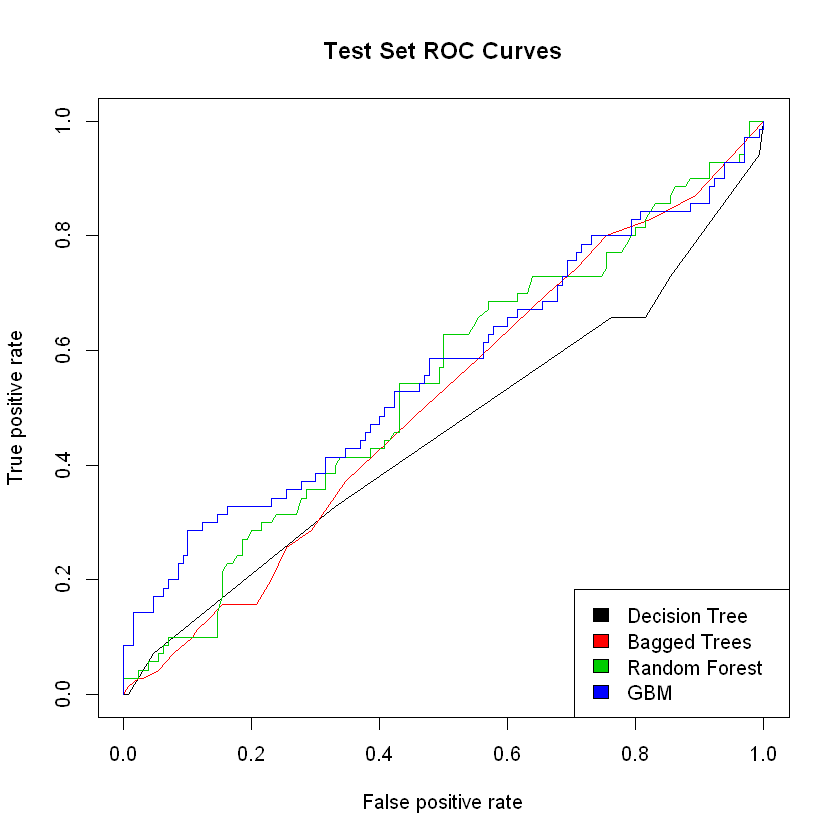

In [81]:
# List of predictions
preds_list <- list(dt_preds, bag_preds, rf_preds, gbm_preds)

# List of actual values (same for all)
m <- length(preds_list)
actuals_list <- rep(list(credit_test$default), m)

# Plot the ROC curves
pred <- prediction(preds_list, actuals_list)
rocs <- performance(pred, "tpr", "fpr")
plot(rocs, col = as.list(1:m), main = "Test Set ROC Curves")
legend(x = "bottomright", 
       legend = c("Decision Tree", "Bagged Trees", "Random Forest", "GBM"),
       fill = 1:m)

# END OF THIS EXCELLENTE COURSE

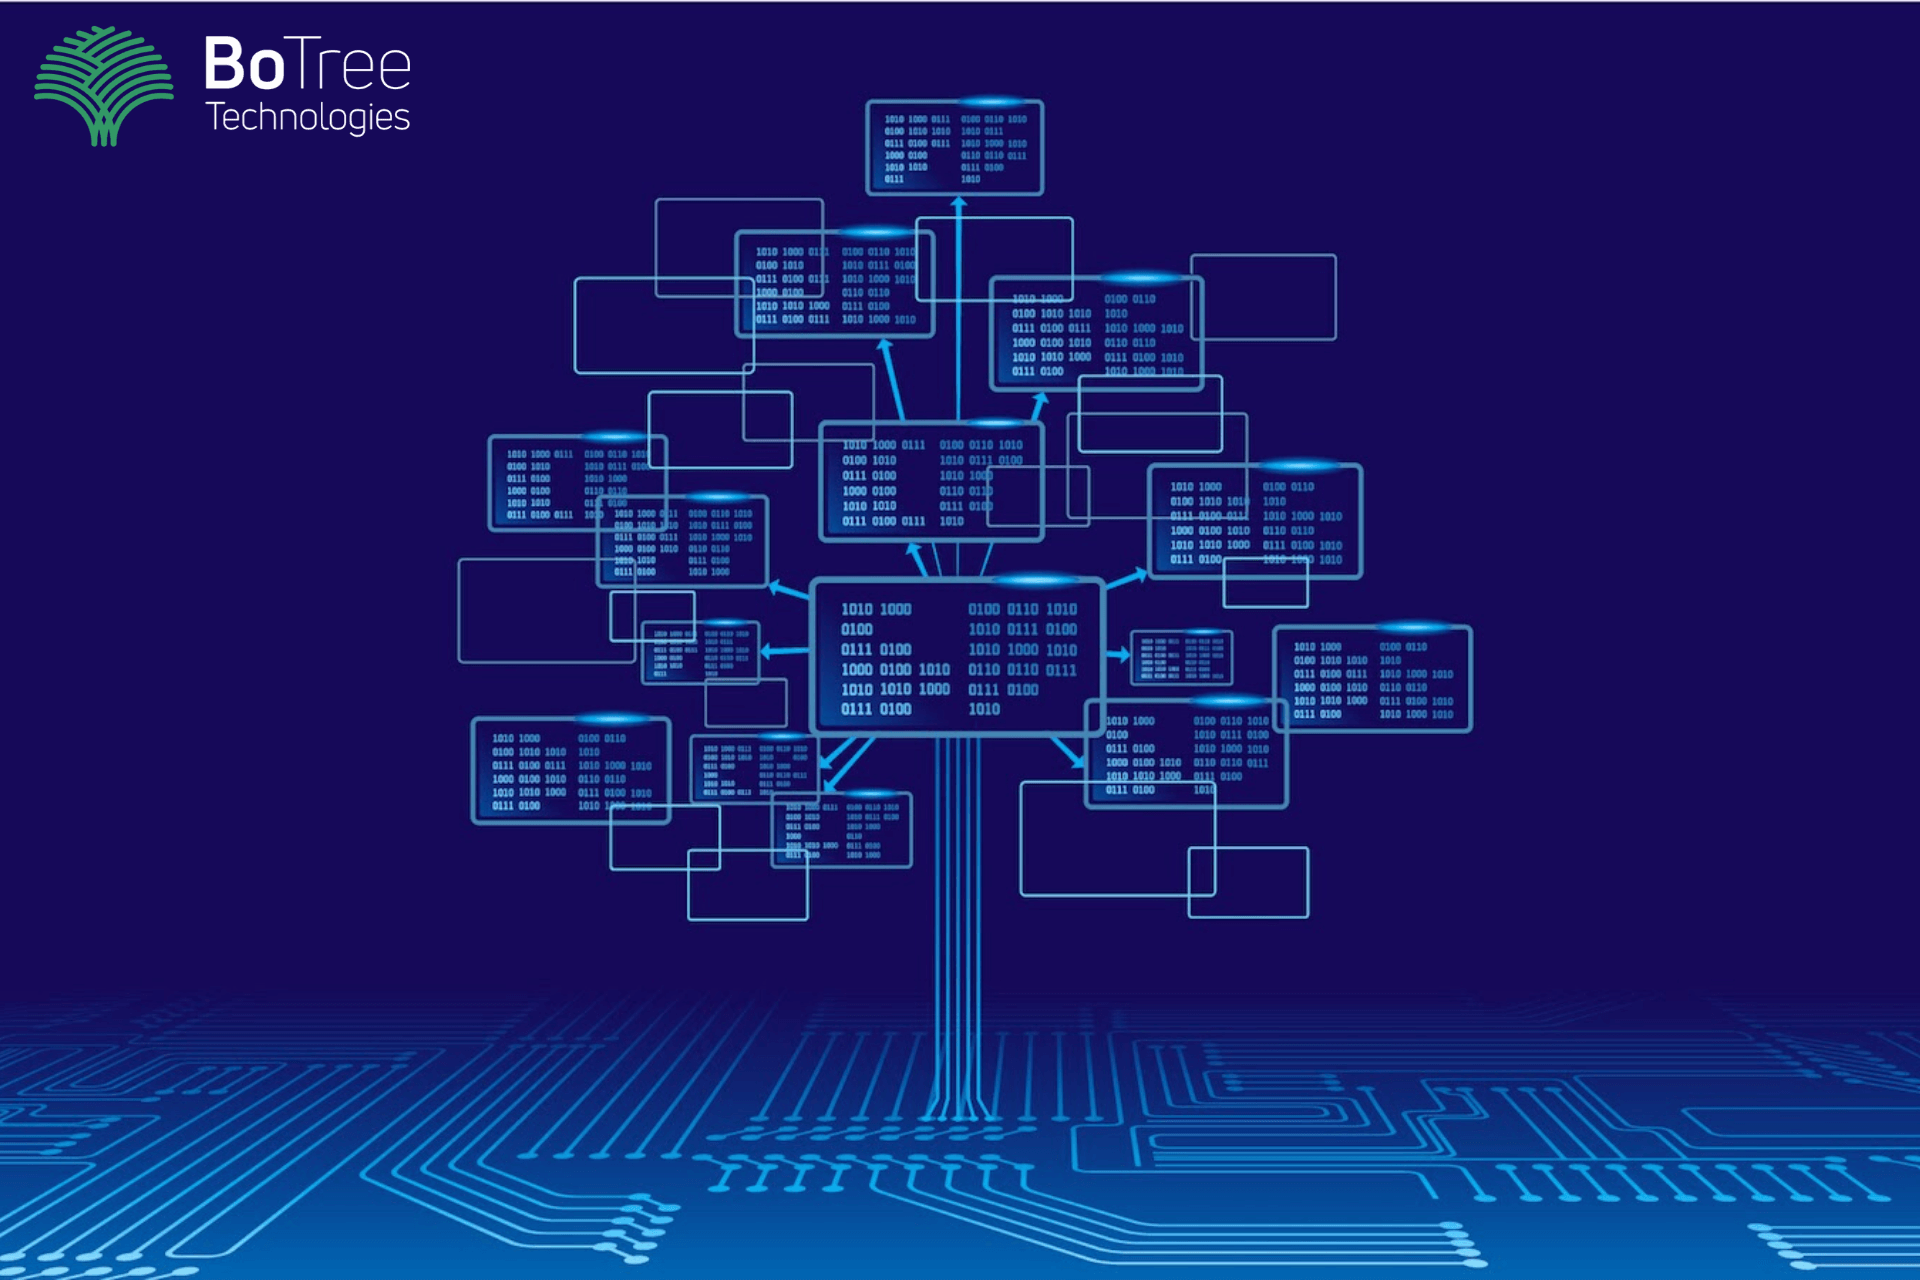

In [77]:
display_png(file="MLT.png")